# NHTSA Complaints Analysis

In this notebook, we'll showcase the analytical tools from NHTSAComplaints.py

## Table of Contents
1. The ```Vehicle``` and ```VehicleList``` Classes
* Methods for Vehicles and VehicleLists
2. Sample Analysis
* Chevy Cobalt Power Steering
* 2009-2011 Toyota Recalls

In [1]:
from NHTSAComplaints import *
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

## 1. The Vehicle and VehicleList Classes

We can specify a single vehicle with a year, make and model. For example, we'll define a 2006 Chevy Cobalt:

In [2]:
v = Vehicle(2012,'ford','focus')
print(v)

2012 FORD FOCUS


If we are unsure about the specific names of a make or model, there are several helper functions available. For example, to get a list of makes for a certain year, we can call ```get_makes(year)```:

In [3]:
print( get_makes(2012) )

['4-STAR', 'ACURA', 'AMERIVAN', 'APRILIA', 'ARISING', 'ASTON MARTIN', 'AUDI', 'BAD BOY', 'BENTLEY', 'BIG TEX', 'BLUE BIRD', 'BMW', 'BOATMATE', 'BRAUNABILITY', 'BUICK', 'CADILLAC', 'CAN-AM', 'CARRIAGE', 'CEDAR CREEK', 'CHAMPION', 'CHEROKEE', 'CHEVROLET', 'CHRYSLER', 'CLUB CAR', 'COACHMEN', 'CODA', 'COLEMAN', 'CONTINENTAL CARGO', 'CROSSROADS', 'CRUISER RV', 'DENALI', 'DODGE', 'DRV', 'DUCATI', 'DUTCHMEN', 'ECLIPSE', 'ENTEGRA', 'EZ LOADER', 'FCCC', 'FEATHERLITE', 'FERRARI', 'FIAT', 'FISKER', 'FLEETWOOD', 'FORD', 'FOREST RIVER', 'FOUR WHEEL & SIX-PAC', 'FOUR WINDS', 'FOURWINDS', 'FREIGHTLINER', 'GMC', 'GULF STREAM', 'HARLEY-DAVIDSON', 'HAUL MASTER', 'HEARTLAND', 'HOLIDAY RAMBLER', 'HONDA', 'HYUNDAI', 'IC', 'IC BUS', 'INFINITI', 'INTERNATIONAL', 'INTERSTATE', 'ISUZU', 'ITASCA', 'JAGUAR', 'JAYCO', 'JAYCO FIFTH WHEEL', 'JAYCO TRAVEL TRAILER', 'JEEP', 'K-Z', 'KARAVAN', 'KAWASAKI', 'KENWORTH', 'KEYSTONE', 'KIA', 'KME', 'KOMFORT', 'KTM', 'KYMCO', 'KZRV', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'LITTLE 

For a list of models of a given make and year, we can call ```get_models(make, year)```:

In [4]:
print( get_models('ford',2012) )

['E-150', 'E-250', 'E-350', 'E-450', 'EDGE', 'ESCAPE', 'ESCAPE HYBRID', 'EXPEDITION', 'EXPLORER', 'F-150', 'F-250', 'F-250 SD', 'F-350', 'F-350 SD', 'F-350 SUPER DUTY', 'F-450', 'F-450 SD', 'F-53', 'F-550', 'F-550 SD', 'F-650', 'FIESTA', 'FLEX', 'FOCUS', 'FOCUS ELECTRIC', 'FUSION', 'FUSION ENERGI', 'FUSION HYBRID', 'MUSTANG', 'POLICE INTERCEPTOR UTILIT', 'TAURUS', 'TRANSIT CONNECT']


There are several methods associated to the vehicle class. They are (currently):
- ```.get_complaint_df()``` - This method returns a dataframe of complaints about the vehicle from the NHTSA.
- ```.get_recall_df()``` - This method returns a dataframe of recalls featuring the vehicle from the NHTSA.
- ```.comp_per_month(endyear, component, datetype)``` - This method produces a bar plot of complaints per month until the endyear for a specified vehicle component. Here, datetype specifies either:
    - ```datetype='recieved'``` - the date the NHTSA recieved the complaint
    - ```datetype='incident'``` - the date the incident was reported to have occurred.

In [5]:
# example of the complaint dataframe for the 2012 Ford Focus
df = v.get_complaint_df()
df.head()

,ODI_ID,MFR_NAME,CRASH_YN,FIRE_YN,NUM_INJURED,NUM_DEATHS,INCIDENT_DT,RECVD_DT,VIN,COMPONENT,DESCR,PRODUCT_TYPE,MODEL_YR,MAKE,MODEL
0,10453300,Ford Motor Company,No,No,0,0,2012-02-17,2012-03-28,NaN,ENGINE AND ENGINE COOLING,"JUST A FEW DAYS AFTER WE BOUGHT THIS CAR, I WA...",VEHICLE,2012,FORD,FOCUS
1,10683800,Ford Motor Company,No,No,0,0,2014-09-08,2015-02-17,1FAHP3H24CL,STEERING,"ON MULTIPLE OCCASIONS, I HAVE HAD THE POWER ST...",VEHICLE,2012,FORD,FOCUS
2,10684200,Ford Motor Company,No,No,0,0,2015-02-11,2015-02-18,1FAHP3H23CL,VISIBILITY:SUN/MOON ROOF ASSEMBLY,SUNROOF EXPLODED WHILE DRIVING. I TOOK CAR TO...,VEHICLE,2012,FORD,FOCUS
3,10883700,Ford Motor Company,No,No,0,0,2016-07-08,2016-07-09T01:20:39Z,1FAHP3K28CL,STRUCTURE:BODY,DRIVER'S DOOR LATCH FAILURE WHILE STATIONARY. ...,VEHICLE,2012,FORD,FOCUS
4,10883800,Ford Motor Company,No,No,0,0,2016-06-17,2016-07-10T13:47:43Z,1FAHP3M24CL,STEERING,THE STEERING WHEEL BECAME VERY HARD TO TURN WH...,VEHICLE,2012,FORD,FOCUS


In [6]:
# example of the recall dataframe for the 2012 Ford Focus
rec = v.get_recall_df()
rec.head()

,BEGMAN_DT,ENDMAN_DT,MFGTXT,CAMPNO,ACTION_NUMBER,REPORT_DATE,COMPONENT,POTAFF,DESCR_DEFECT,CONSEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,PRODUCT_TYPE,MODEL_YR,MAKE,MODEL
0,NaN,NaN,"YAKIMA PRODUCTS, INC.",12E035000,NaN,2012-10-02,EQUIPMENT,NaN,This recall involves aftermarket parts sold by...,Without proper contact of the rooftop rack cli...,"Yakima will notify owners, and Yakima or a Yak...",Owners may also contact the National Highway T...,NaN,2012,FORD,FOCUS
1,NaN,NaN,FORD MOTOR COMPANY,12V149000,NaN,2012-04-05,VISIBILITY:WINDSHIELD WIPER/WASHER:SWITCH/WIRING,NaN,FORD IS RECALLING CERTAIN MODEL YEAR 2012 FOCU...,WATER OR OTHER CONTAMINANTS MAY ACCUMULATE IN ...,"FORD WILL NOTIFY OWNERS, AND DEALERS WILL INSP...",FORD'S SAFETY RECALL CAMPAIGN NUMBER IS 12S29....,NaN,2012,FORD,FOCUS
2,NaN,NaN,Ford Motor Company,13V335000,NaN,2013-08-01,EXTERIOR LIGHTING,NaN,Ford is recalling certain model year 2012-2013...,Without the proper illumination of the side ma...,"Ford will notify owners, and dealers will modi...",Owners may also contact the National Highway T...,NaN,2012,FORD,FOCUS
3,NaN,NaN,Ford Motor Company,16V643000,PE16001,2016-09-06,LATCHES/LOCKS/LINKAGES:DOORS:LATCH,NaN,Ford Motor Company (Ford) is recalling certain...,A door that is not securely latched could open...,"Ford will notify owners, and dealers will repl...",Owners may also contact the National Highway T...,NaN,2012,FORD,FOCUS
4,NaN,NaN,Ford Motor Company,18V735000,NaN,2018-10-22,"FUEL SYSTEM, GASOLINE:STORAGE",NaN,Ford Motor Company (Ford) is recalling certain...,The excessive vaccuum may result in an engine ...,"Ford will notify owners, and dealers will repr...",Owners may also contact the National Highway T...,NaN,2012,FORD,FOCUS


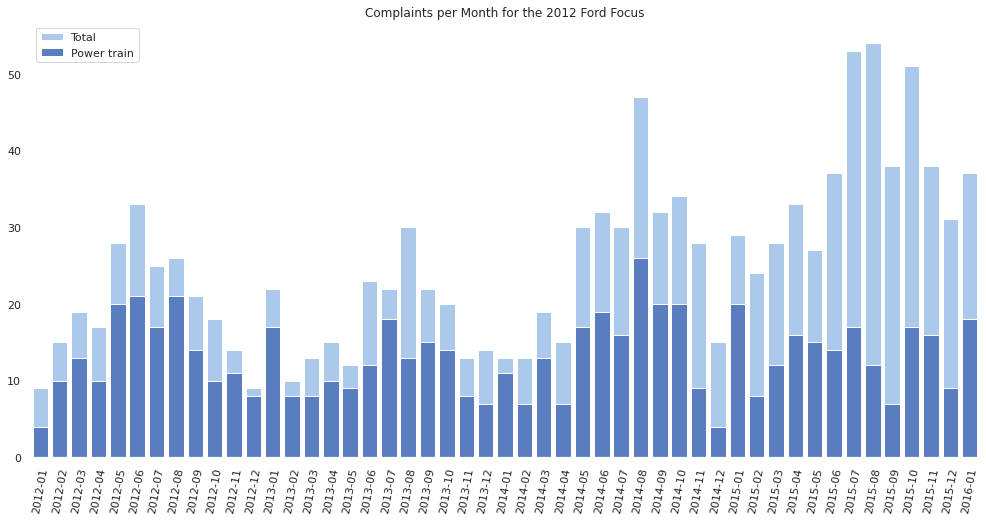

In [7]:
# complaints per month for the steering components
v.comp_per_month(2016, 'POWER TRAIN', 'incident')

It is common for component issues to persist through 2 or more production years. This motivates the ```VehicleList``` class, which has methods for comparing issues across multiple production years or multiple models.

In [8]:
v_list = VehicleList([Vehicle(2006, 'chevrolet', 'cobalt'), Vehicle(2007, 'chevrolet', 'cobalt'), Vehicle(2008, 'chevrolet', 'cobalt')])
print(v_list)

['2006 CHEVROLET COBALT', '2007 CHEVROLET COBALT', '2008 CHEVROLET COBALT']


There are several methods associated to the ```VehicleList``` class. They are (currently):
- ```.get_complaints()``` - This method produces a dictionary of complaint dataframes of the form ```{Vehicle : DataFrame of complaints}```
- ```.get_recalls()``` - This method produces a dictionary of recall dataframes of the form ```{Vehicle : DataFrame of recalls}```
- ```.component_parts(keyword)``` - This method produces a list of components mentioned in the complaint data. Here, ```keyword``` can take the values:
    - ```keyword='ALL'``` - produces a list of all components featured
    - ```keyword='STEERING'``` - (for example) this returns a list of subcomponents in the "steering" category.
- ```.create_heatmap(keyword, value)``` - This method produces a heatmap displaying how many complaints were received for each component. The ```keyword``` parameter is as above, and the ```value``` parameter can take the values ```complaints, fires, injuries, crashes, or deaths```. 

## 2. Sample Analysis

### Chevy Cobalt

* https://www.autoblog.com/2010/03/02/gm-recalls-1-3-million-cobalts-g5s-for-power-steering-problem/

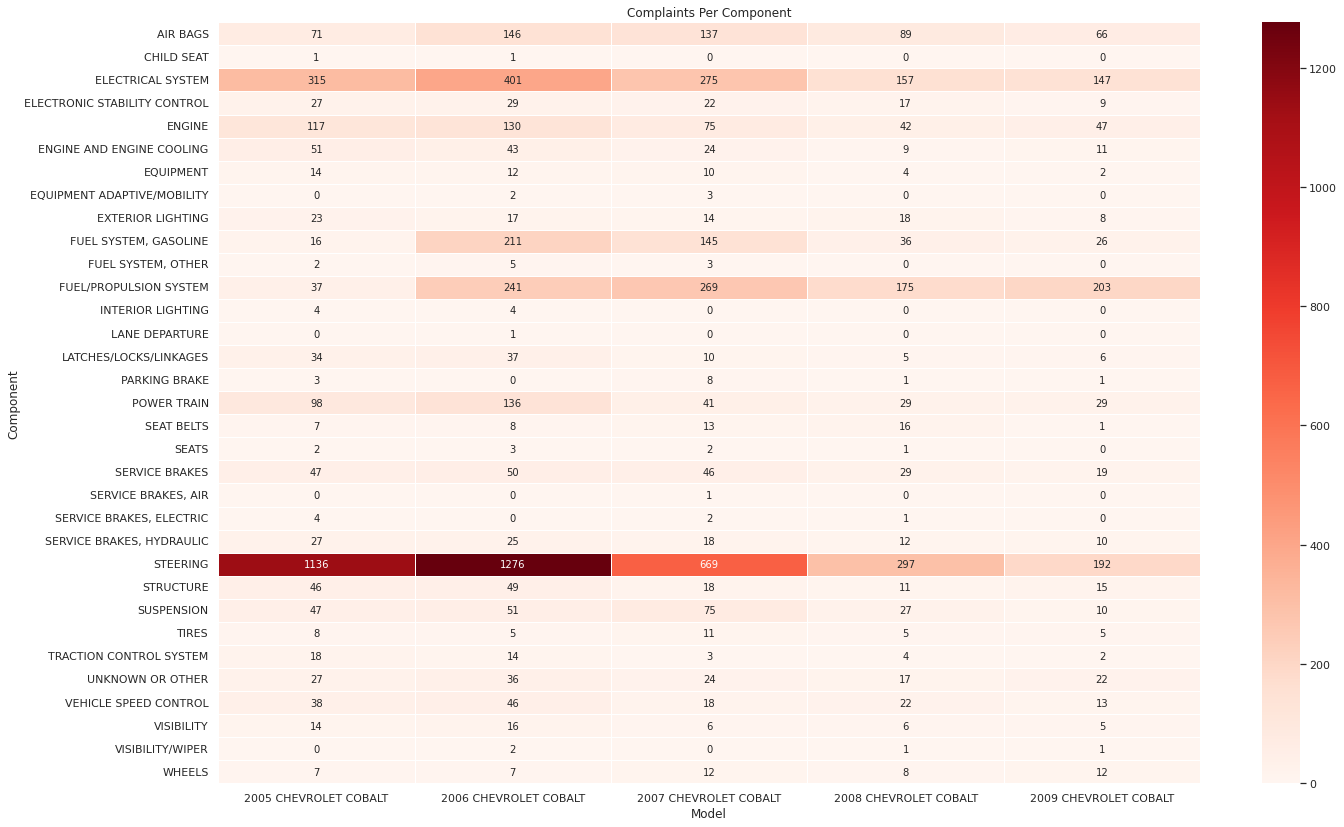

In [13]:
cobalts_05_10 = VehicleList([Vehicle(i, 'chevrolet', 'cobalt') for i in range(2005,2010)])
cobalts_05_10.create_heatmap('ALL', 'complaints')

Let's dig a bit deeper into the steering issues:

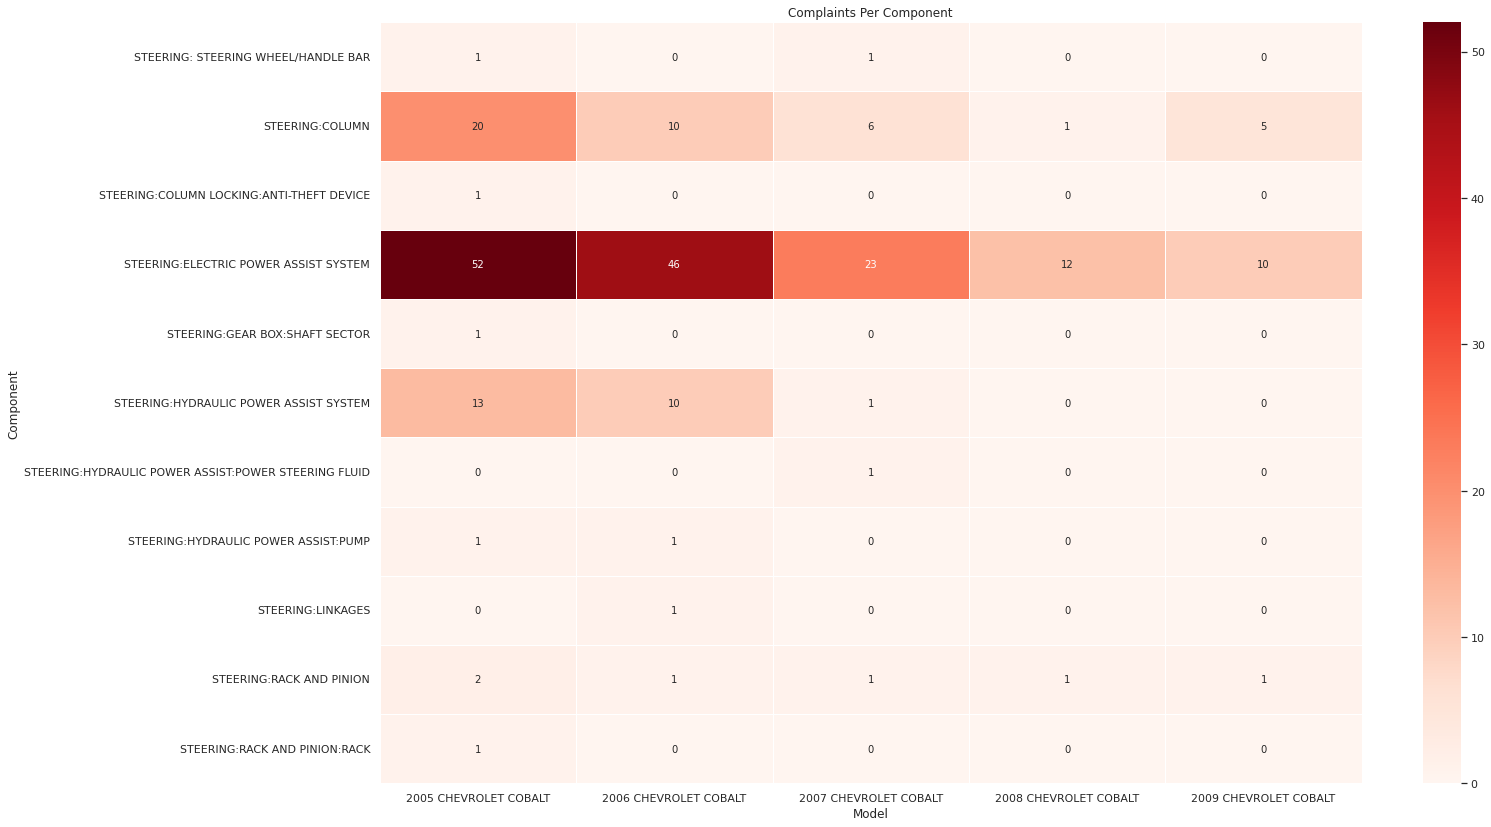

In [14]:
cobalts_05_10.create_heatmap('STEERING', 'complaints')

Now let's check if the issue has a recall associated to it:

In [25]:
recall_dfs = cobalts_05_10.get_recalls()
rec = pd.concat([recall_dfs[key] for key in recall_dfs.keys()])
cobalt_steering = rec[rec['COMPONENT'].str.contains('STEERING')]
cobalt_steering

,BEGMAN_DT,ENDMAN_DT,MFGTXT,CAMPNO,ACTION_NUMBER,REPORT_DATE,COMPONENT,POTAFF,DESCR_DEFECT,CONSEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,PRODUCT_TYPE,MODEL_YR,MAKE,MODEL
2,NaN,NaN,GENERAL MOTORS CORP.,10V073000,PE10005,2010-03-03,STEERING:ELECTRIC POWER ASSIST SYSTEM,NaN,GENERAL MOTORS IS RECALLING CERTAIN MODEL YEAR...,"IF POWER STEERING ASSIST IS LOST, IT WOULD REQ...",DEALERS WILL REPLACE THE ELECTRIC POWER STEERI...,GM'S RECALL NO. N100023. OWNERS MAY ALSO CONT...,NaN,2005,CHEVROLET,COBALT
2,NaN,NaN,GENERAL MOTORS CORP.,10V073000,PE10005,2010-03-03,STEERING:ELECTRIC POWER ASSIST SYSTEM,NaN,GENERAL MOTORS IS RECALLING CERTAIN MODEL YEAR...,"IF POWER STEERING ASSIST IS LOST, IT WOULD REQ...",DEALERS WILL REPLACE THE ELECTRIC POWER STEERI...,GM'S RECALL NO. N100023. OWNERS MAY ALSO CONT...,NaN,2006,CHEVROLET,COBALT
1,NaN,NaN,GENERAL MOTORS CORP.,10V073000,PE10005,2010-03-03,STEERING:ELECTRIC POWER ASSIST SYSTEM,NaN,GENERAL MOTORS IS RECALLING CERTAIN MODEL YEAR...,"IF POWER STEERING ASSIST IS LOST, IT WOULD REQ...",DEALERS WILL REPLACE THE ELECTRIC POWER STEERI...,GM'S RECALL NO. N100023. OWNERS MAY ALSO CONT...,NaN,2007,CHEVROLET,COBALT
0,NaN,NaN,GENERAL MOTORS CORP.,10V073000,PE10005,2010-03-03,STEERING:ELECTRIC POWER ASSIST SYSTEM,NaN,GENERAL MOTORS IS RECALLING CERTAIN MODEL YEAR...,"IF POWER STEERING ASSIST IS LOST, IT WOULD REQ...",DEALERS WILL REPLACE THE ELECTRIC POWER STEERI...,GM'S RECALL NO. N100023. OWNERS MAY ALSO CONT...,NaN,2008,CHEVROLET,COBALT
1,NaN,NaN,GENERAL MOTORS CORP.,10V073000,PE10005,2010-03-03,STEERING:ELECTRIC POWER ASSIST SYSTEM,NaN,GENERAL MOTORS IS RECALLING CERTAIN MODEL YEAR...,"IF POWER STEERING ASSIST IS LOST, IT WOULD REQ...",DEALERS WILL REPLACE THE ELECTRIC POWER STEERI...,GM'S RECALL NO. N100023. OWNERS MAY ALSO CONT...,NaN,2009,CHEVROLET,COBALT


This shows that the recall was issued in early 2010. When did Chevy know about the issue? Let's check the 2005 Cobalt as an example:

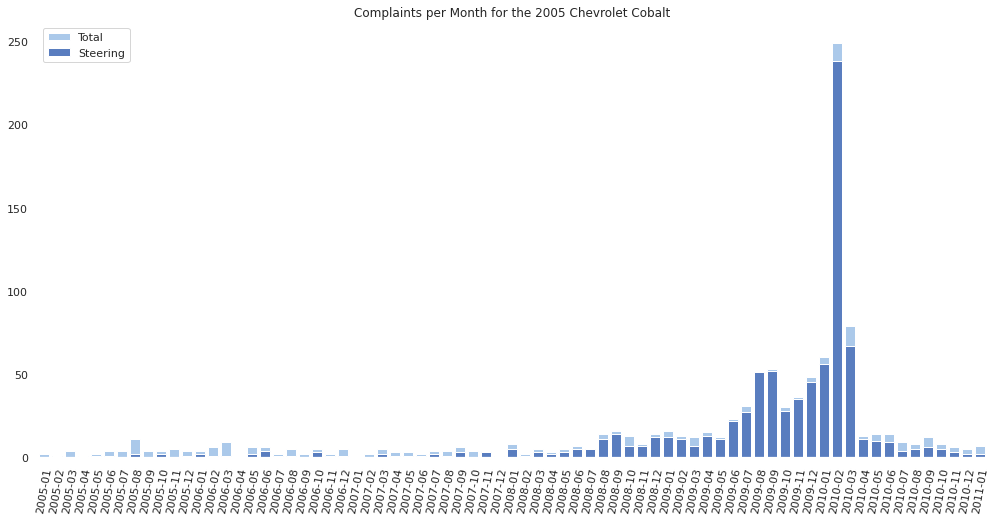

In [27]:
cobalts_05_10.vehicle_list[0].comp_per_month(2011, 'STEERING', 'received')

### Beige Bites Back
As a somewhat well-known example, in the years 2009-2011, Toyota issued a recall of many different models due to accelerator pedals getting stuck.

* https://en.wikipedia.org/w/index.php?title=2009%E2%80%932011_Toyota_vehicle_recalls&oldformat=true#Affected_vehicles_and_vehicle_lines

We can detect this with our heatmap, for a subset of the affected vehicles:

In [47]:
corollas = [Vehicle(year, 'toyota', 'corolla') for year in range(2009,2011)]
camrys = [Vehicle(year, 'toyota', 'camry') for year in range(2007,2011)]
avalons = [Vehicle(year, 'toyota', 'avalon') for year in range(2005,2010)]
toyota_list = VehicleList(corollas+camrys+avalons)

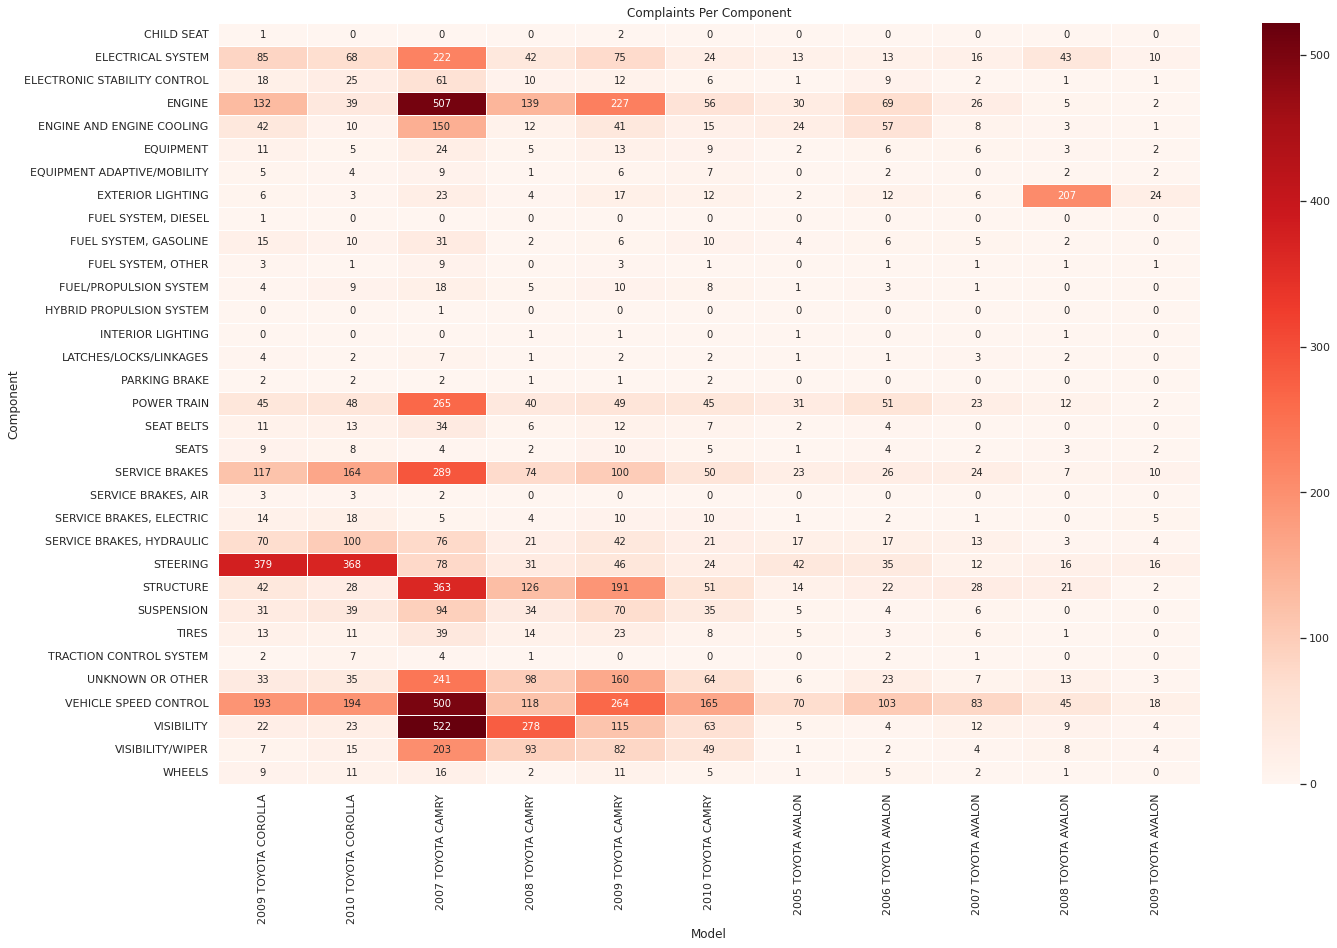

In [48]:
toyota_list.create_heatmap('ALL', 'complaints',air_bags=False)

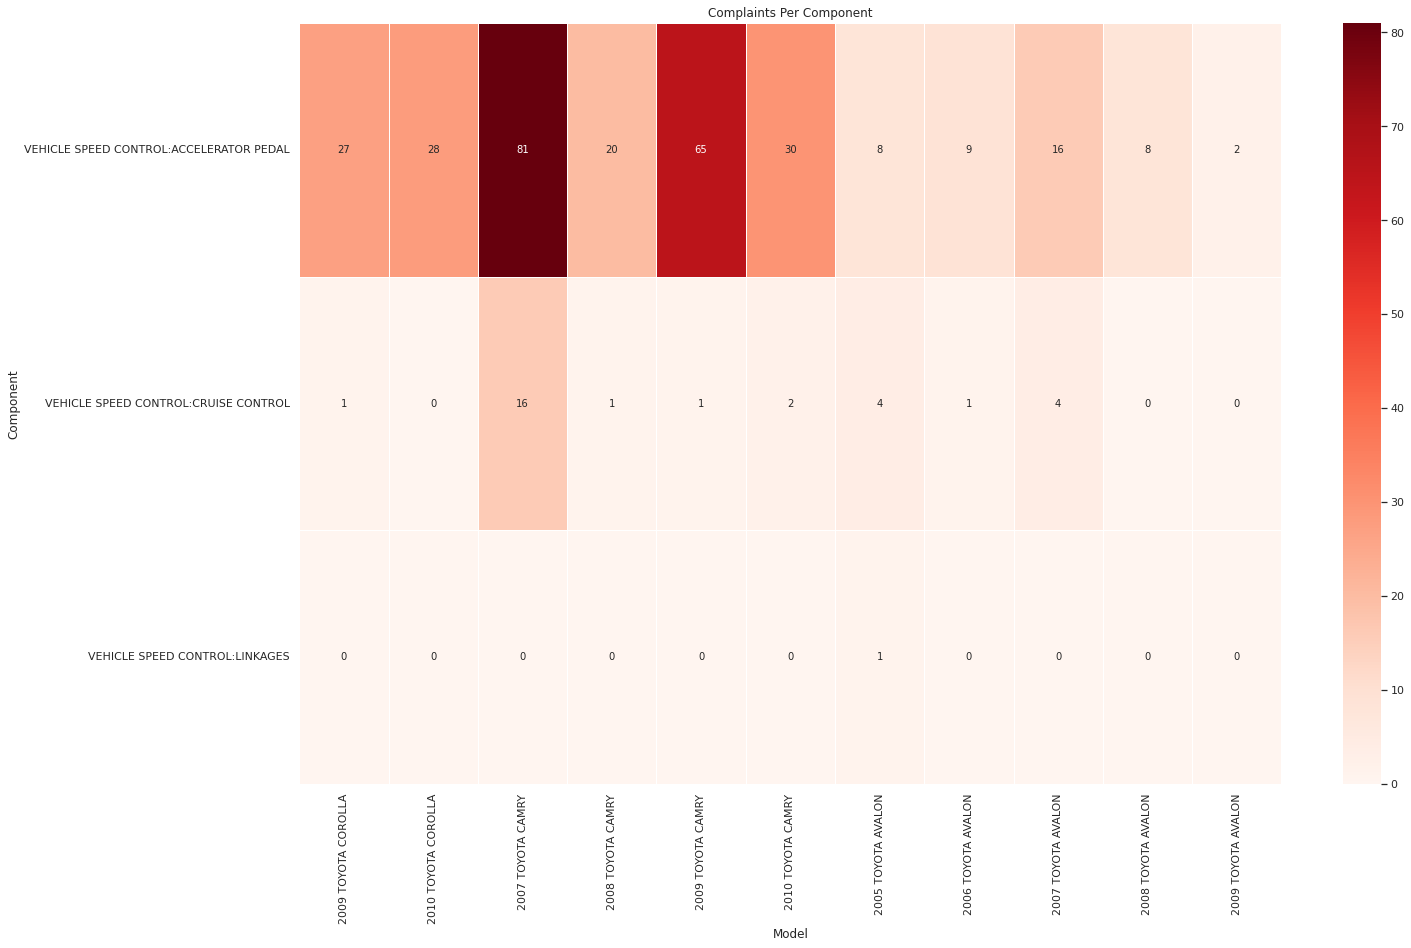

In [49]:
toyota_list.create_heatmap('VEHICLE SPEED CONTROL', 'complaints')

As expected, the main issue is with the accelerator pedals. 